# Stellar Spectroscopy: The Chemical Composition of Stars

Welcome to the journey of understanding stellar spectroscopy! This notebook explores how we use light from stars to determine their properties, starting with blackbody radiation and moving toward understanding stellar spectra.

## Topics Covered:
1. **Blackbody Radiation** - Understanding how stars emit light
2. **Photometry and Colors** - Using brightness ratios to estimate temperature
3. **Stellar Spectra** - The rich information contained in absorption lines
4. **Chemical Composition** - How spectra reveal what stars are made of

In [2]:
pip install astropy

  Using cached pyerfa-2.0.1.5-cp39-abi3-win_amd64.whl.metadata (5.9 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.4 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------- 6.4/6.4 MB 27.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 23.3 MB/s  0:00:00
Using cached pyerfa-2.0.1.5-cp39-abi3-win_amd64.whl (349 kB)
Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl (154 kB)

   ---------------------------------------- 0/4 [PyYAML]
   ---------------------------------------- 0/4 [PyYAML]
   ---------- ----------------------------- 1/4 [pyerfa]
   -------------------- ------------------- 2/4 [astropy-iers-data]
   ------------------------------ --------- 3/4 [astropy]
   ------------------------------ --------- 3/4 [astropy]
   ------------

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
import warnings
warnings.filterwarnings('ignore')

# Enable quantity support for matplotlib
quantity_support()

print("Libraries imported successfully!")
print(f"Astropy units available: {u.__version__ if hasattr(u, '__version__') else 'loaded'}")

Libraries imported successfully!
Astropy units available: loaded


## 1. Blackbody Radiation: The Foundation

Stars emit light approximately as **blackbodies** - perfect thermal radiators. The spectrum of a blackbody depends only on its temperature and follows Planck's law.

Let's visualize blackbody spectra for different stellar temperatures!

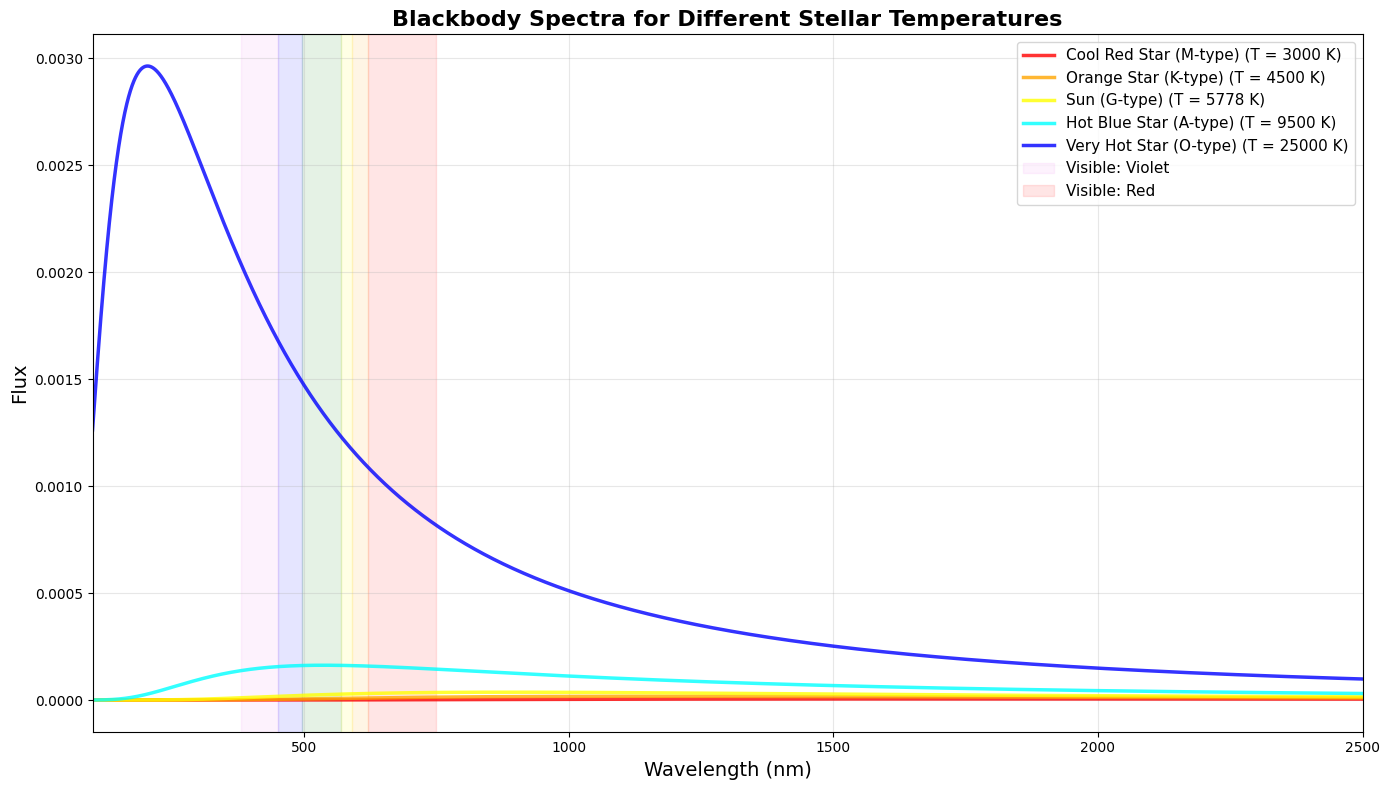


✨ Key Observations:
1. Hotter stars emit more total energy (curves are higher)
2. Peak wavelength shifts to shorter wavelengths for hotter stars (Wien's Law)
3. Cool stars appear red, hot stars appear blue


In [4]:
# Define wavelength range (from UV to near-IR)
wavelengths = np.linspace(100, 2500, 5000) * u.nm

# Define stellar temperatures (in Kelvin)
# These represent different spectral classes:
temperatures = {
    'Cool Red Star (M-type)': 3000 * u.K,
    'Orange Star (K-type)': 4500 * u.K,
    'Sun (G-type)': 5778 * u.K,
    'Hot Blue Star (A-type)': 9500 * u.K,
    'Very Hot Star (O-type)': 25000 * u.K
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot blackbody curves for each temperature
colors = ['red', 'orange', 'yellow', 'cyan', 'blue']
for (name, temp), color in zip(temperatures.items(), colors):
    # Create blackbody model
    bb = BlackBody(temperature=temp)
    
    # Calculate flux
    flux = bb(wavelengths)
    
    # Plot
    ax.plot(wavelengths, flux, label=f'{name} (T = {temp.value:.0f} K)', 
            linewidth=2.5, color=color, alpha=0.8)

# Add visual regions for electromagnetic spectrum
ax.axvspan(380, 450, alpha=0.1, color='violet', label='Visible: Violet')
ax.axvspan(450, 495, alpha=0.1, color='blue')
ax.axvspan(495, 570, alpha=0.1, color='green')
ax.axvspan(570, 590, alpha=0.1, color='yellow')
ax.axvspan(590, 620, alpha=0.1, color='orange')
ax.axvspan(620, 750, alpha=0.1, color='red', label='Visible: Red')

ax.set_xlabel('Wavelength (nm)', fontsize=14)
ax.set_ylabel('Flux', fontsize=14)
ax.set_title('Blackbody Spectra for Different Stellar Temperatures', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(100, 2500)

plt.tight_layout()
plt.show()

print("\n✨ Key Observations:")
print("1. Hotter stars emit more total energy (curves are higher)")
print("2. Peak wavelength shifts to shorter wavelengths for hotter stars (Wien's Law)")
print("3. Cool stars appear red, hot stars appear blue")

## 2. Wien's Displacement Law

The peak wavelength of a blackbody spectrum shifts with temperature according to:

$$\lambda_{max} = \frac{b}{T}$$

where $b = 2.898 \times 10^{-3}$ m·K is Wien's displacement constant.

In [5]:
# Calculate peak wavelengths for our stellar temperatures
from astropy.constants import b_wien

print("Peak Wavelengths for Different Stars:")
print("=" * 60)

peak_data = []
for name, temp in temperatures.items():
    lambda_max = b_wien / temp
    lambda_max_nm = lambda_max.to(u.nm)
    
    # Determine color region
    if lambda_max_nm.value < 380:
        region = "UV (Ultraviolet)"
    elif lambda_max_nm.value < 450:
        region = "Violet"
    elif lambda_max_nm.value < 495:
        region = "Blue"
    elif lambda_max_nm.value < 570:
        region = "Green"
    elif lambda_max_nm.value < 590:
        region = "Yellow"
    elif lambda_max_nm.value < 620:
        region = "Orange"
    elif lambda_max_nm.value < 750:
        region = "Red"
    else:
        region = "IR (Infrared)"
    
    print(f"{name:30s}: λ_max = {lambda_max_nm.value:7.1f} nm ({region})")
    peak_data.append((temp.value, lambda_max_nm.value))

print("\n💡 This is why hot stars look blue and cool stars look red!")

Peak Wavelengths for Different Stars:
Cool Red Star (M-type)        : λ_max =   965.9 nm (IR (Infrared))
Orange Star (K-type)          : λ_max =   643.9 nm (Red)
Sun (G-type)                  : λ_max =   501.5 nm (Green)
Hot Blue Star (A-type)        : λ_max =   305.0 nm (UV (Ultraviolet))
Very Hot Star (O-type)        : λ_max =   115.9 nm (UV (Ultraviolet))

💡 This is why hot stars look blue and cool stars look red!


## 3. Photometry and Color Indices

Astronomers use **filters** to measure stellar brightness in specific wavelength bands. Common filter systems include:
- **Johnson-Cousins**: U, B, V, R, I (Ultraviolet, Blue, Visual, Red, Infrared)
- **SDSS**: u', g', r', i', z' (Sloan Digital Sky Survey)

By comparing brightness ratios through different filters, we can estimate stellar temperatures!

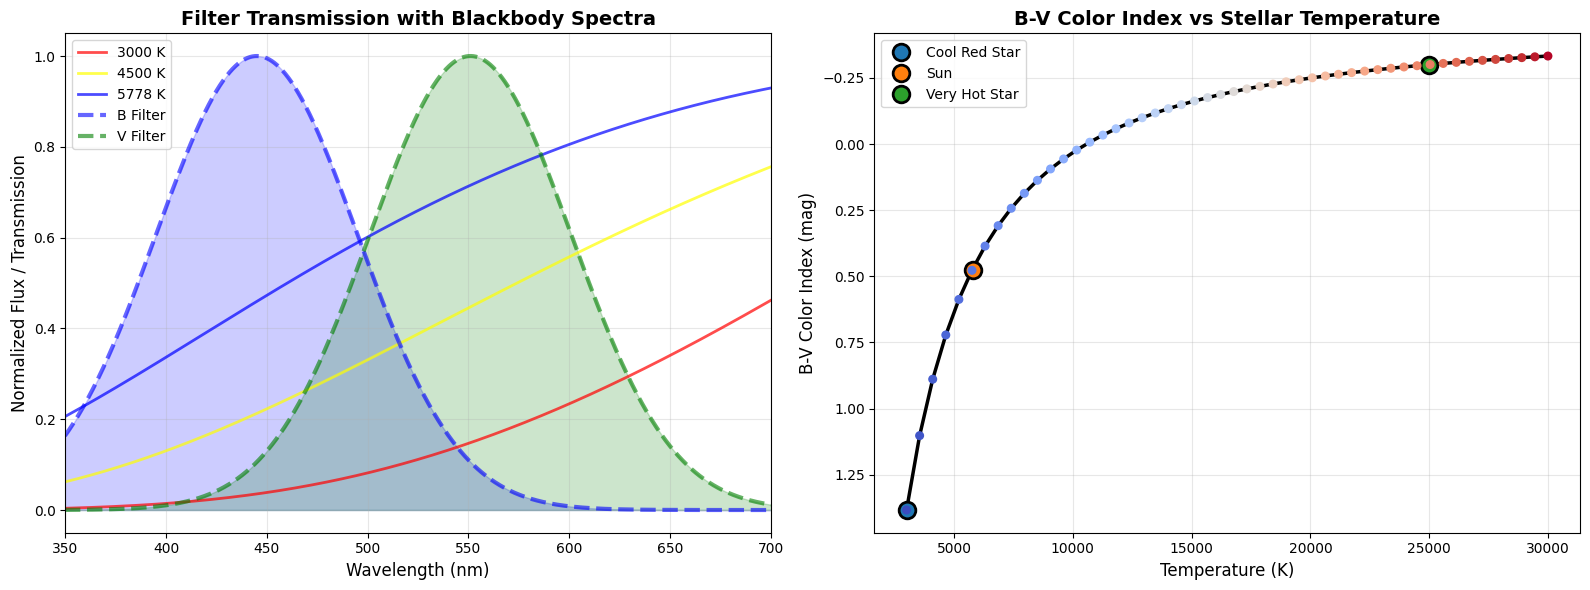


🎨 Color Index Interpretation:
• B-V > 1.0: Red stars (cool)
• B-V ≈ 0.6: Yellow stars (like our Sun)
• B-V < 0.0: Blue stars (hot)

By measuring B-V, we estimate stellar temperature!


In [6]:
# Simulate simple filter transmission functions
# Johnson B and V filters (approximate)

def gaussian_filter(wavelengths, center, width):
    """Create a Gaussian-shaped filter transmission function"""
    return np.exp(-0.5 * ((wavelengths - center) / width)**2)

# Define filter properties (approximate)
filter_B_center = 445 * u.nm  # Blue filter
filter_B_width = 50 * u.nm
filter_V_center = 551 * u.nm  # Visual filter
filter_V_width = 50 * u.nm

# Create wavelength array for integration
wave_array = np.linspace(300, 900, 2000) * u.nm

# Calculate B and V magnitudes for each stellar temperature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Show filter transmission with blackbody spectra
for (name, temp), color in zip(list(temperatures.items())[:3], ['red', 'yellow', 'blue']):
    bb = BlackBody(temperature=temp)
    flux = bb(wave_array)
    ax1.plot(wave_array, flux/flux.max(), label=f'{temp.value:.0f} K', 
             linewidth=2, color=color, alpha=0.7)

# Add filter transmission curves
filter_B = gaussian_filter(wave_array.value, filter_B_center.value, filter_B_width.value)
filter_V = gaussian_filter(wave_array.value, filter_V_center.value, filter_V_width.value)

ax1.plot(wave_array, filter_B, 'b--', linewidth=3, label='B Filter', alpha=0.6)
ax1.plot(wave_array, filter_V, 'g--', linewidth=3, label='V Filter', alpha=0.6)
ax1.fill_between(wave_array.value, 0, filter_B, alpha=0.2, color='blue')
ax1.fill_between(wave_array.value, 0, filter_V, alpha=0.2, color='green')

ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Normalized Flux / Transmission', fontsize=12)
ax1.set_title('Filter Transmission with Blackbody Spectra', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(350, 700)

# Right plot: B-V color index vs Temperature
bv_colors = []
temps_list = []

for temp_value in np.linspace(3000, 30000, 50):
    temp = temp_value * u.K
    bb = BlackBody(temperature=temp)
    flux = bb(wave_array)
    
    # Integrate flux through each filter
    flux_B = np.trapz(flux.value * filter_B, wave_array.value)
    flux_V = np.trapz(flux.value * filter_V, wave_array.value)
    
    # Calculate B-V color index (magnitude difference)
    # B-V = -2.5 * log10(flux_B / flux_V) + constant
    # For simplicity, we'll use relative values
    bv = -2.5 * np.log10(flux_B / flux_V)
    
    bv_colors.append(bv)
    temps_list.append(temp_value)

ax2.plot(temps_list, bv_colors, 'k-', linewidth=2.5)
ax2.scatter(temps_list, bv_colors, c=temps_list, cmap='coolwarm', s=30, zorder=3)

# Mark our example stars
for name, temp in temperatures.items():
    if temp.value in [3000, 5778, 25000]:
        idx = np.argmin(np.abs(np.array(temps_list) - temp.value))
        ax2.plot(temp.value, bv_colors[idx], 'o', markersize=12, 
                markeredgewidth=2, markeredgecolor='black', 
                label=f'{name.split("(")[0].strip()}')

ax2.set_xlabel('Temperature (K)', fontsize=12)
ax2.set_ylabel('B-V Color Index (mag)', fontsize=12)
ax2.set_title('B-V Color Index vs Stellar Temperature', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()  # Astronomers plot magnitudes inverted

plt.tight_layout()
plt.show()

print("\n🎨 Color Index Interpretation:")
print("• B-V > 1.0: Red stars (cool)")
print("• B-V ≈ 0.6: Yellow stars (like our Sun)")
print("• B-V < 0.0: Blue stars (hot)")
print("\nBy measuring B-V, we estimate stellar temperature!")

## 4. Beyond Photometry: The Power of Spectroscopy

While photometry gives us temperature estimates, **spectroscopy** reveals so much more:

### What Spectra Tell Us:
1. **Precise Temperature** - From line ratios and continuum shape
2. **Chemical Composition** - Each element has unique absorption lines
3. **Surface Gravity** - Line widths reveal atmospheric density
4. **Rotation** - Line broadening from Doppler shifts
5. **Radial Velocity** - Overall Doppler shift
6. **Magnetic Fields** - Zeeman splitting of lines

### Types of Spectra:
- **Continuous Spectrum**: Smooth blackbody-like emission (from dense, hot gas)
- **Absorption Spectrum**: Dark lines on bright background (stellar atmospheres)
- **Emission Spectrum**: Bright lines on dark background (hot, thin gas in nebulae)

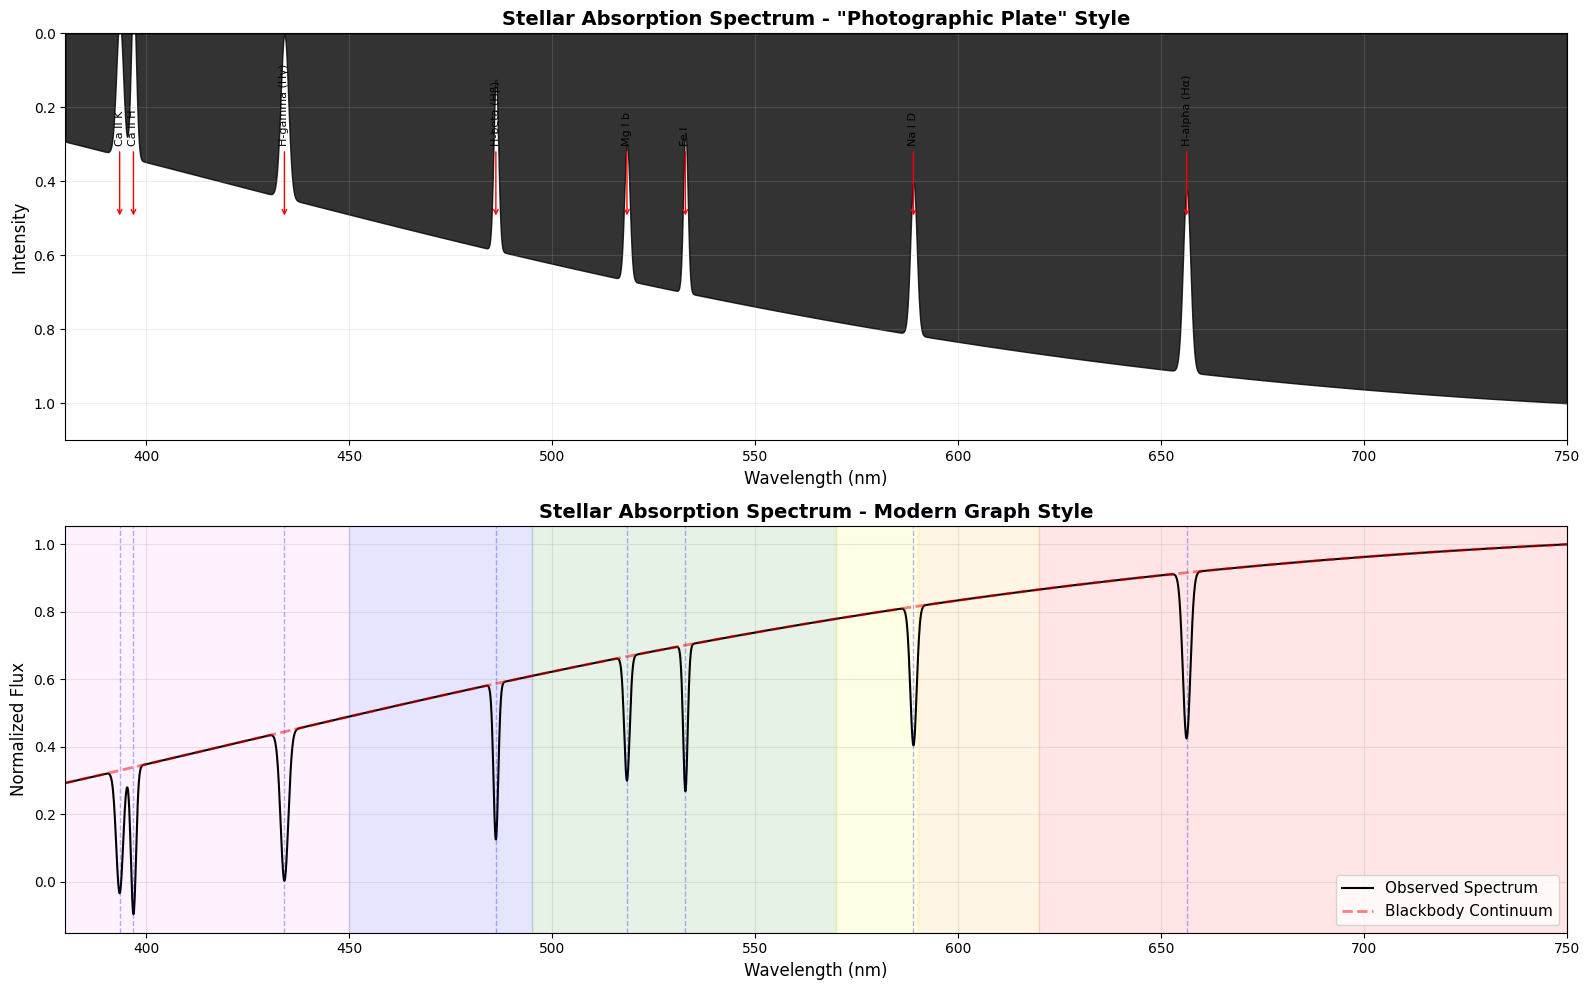


🌟 Absorption Lines Reveal:
• Each dip corresponds to a specific atom/ion absorbing photons
• H-alpha, H-beta, H-gamma: Hydrogen (most abundant element)
• Ca II K & H: Ionized calcium (strong in solar-type stars)
• Na I D: Neutral sodium
• These 'fingerprints' reveal the star's chemical composition!


In [7]:
# Simulate a simple stellar absorption spectrum
# We'll add absorption lines to a blackbody continuum

# Use Sun-like temperature
T_sun = 5778 * u.K
bb_sun = BlackBody(temperature=T_sun)

# Wavelength range in visible spectrum
wavelengths_vis = np.linspace(380, 750, 5000) * u.nm
continuum = bb_sun(wavelengths_vis)

# Normalize continuum
continuum_norm = continuum / continuum.max()

# Define some prominent absorption lines (wavelengths in nm)
# These are simplified representations of real stellar lines
absorption_lines = {
    'H-alpha (Hα)': 656.3,      # Hydrogen
    'H-beta (Hβ)': 486.1,       # Hydrogen
    'H-gamma (Hγ)': 434.0,      # Hydrogen
    'Ca II K': 393.4,           # Calcium
    'Ca II H': 396.8,           # Calcium
    'Na I D': 589.0,            # Sodium (doublet approximated)
    'Mg I b': 518.4,            # Magnesium
    'Fe I': 532.8,              # Iron (one of many)
}

# Create absorption spectrum
spectrum = continuum_norm.value.copy()

for line_name, line_wave in absorption_lines.items():
    # Create Gaussian absorption line
    depth = 0.3 + 0.2 * np.random.random()  # Random depth
    width = 0.5 + 0.5 * np.random.random()   # Random width
    
    line_profile = depth * np.exp(-0.5 * ((wavelengths_vis.value - line_wave) / width)**2)
    spectrum -= line_profile

# Create figure with two panels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Top panel: Traditional "plate" style (dark lines on bright background)
ax1.fill_between(wavelengths_vis.value, 0, spectrum, color='black', alpha=0.8)
ax1.set_ylim(0, 1.1)
ax1.set_xlim(380, 750)
ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.set_title('Stellar Absorption Spectrum - "Photographic Plate" Style', 
              fontsize=14, fontweight='bold')
ax1.invert_yaxis()  # Invert to show dark lines on bright background
ax1.set_facecolor('white')
ax1.grid(True, alpha=0.2)

# Add element labels
for line_name, line_wave in absorption_lines.items():
    if 380 < line_wave < 750:
        ax1.annotate(line_name, xy=(line_wave, 0.5), xytext=(line_wave, 0.3),
                    fontsize=8, ha='center', rotation=90,
                    arrowprops=dict(arrowstyle='->', color='red', lw=1))

# Bottom panel: Modern graph style (intensity vs wavelength)
ax2.plot(wavelengths_vis.value, spectrum, 'k-', linewidth=1.5, label='Observed Spectrum')
ax2.plot(wavelengths_vis.value, continuum_norm.value, 'r--', linewidth=2, 
         alpha=0.5, label='Blackbody Continuum')

# Mark absorption lines
for line_name, line_wave in absorption_lines.items():
    if 380 < line_wave < 750:
        ax2.axvline(line_wave, color='blue', alpha=0.3, linestyle='--', linewidth=1)
        
ax2.set_xlabel('Wavelength (nm)', fontsize=12)
ax2.set_ylabel('Normalized Flux', fontsize=12)
ax2.set_title('Stellar Absorption Spectrum - Modern Graph Style', 
              fontsize=14, fontweight='bold')
ax2.set_xlim(380, 750)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Add colored background for visible spectrum
colors_vis = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
bounds = [380, 450, 495, 570, 590, 620, 750]
for i in range(len(colors_vis)):
    ax2.axvspan(bounds[i], bounds[i+1], alpha=0.1, color=colors_vis[i])

plt.tight_layout()
plt.show()

print("\n🌟 Absorption Lines Reveal:")
print("• Each dip corresponds to a specific atom/ion absorbing photons")
print("• H-alpha, H-beta, H-gamma: Hydrogen (most abundant element)")
print("• Ca II K & H: Ionized calcium (strong in solar-type stars)")
print("• Na I D: Neutral sodium")
print("• These 'fingerprints' reveal the star's chemical composition!")

## 5. Spectral Classification: The Harvard System

Stars are classified by their spectra into types: **O, B, A, F, G, K, M**
(Mnemonic: "Oh Be A Fine Girl/Guy, Kiss Me")

Each type has characteristic absorption lines and temperature ranges:

| Type | Temperature (K) | Color | Key Features |
|------|----------------|-------|--------------|
| O | 30,000 - 50,000 | Blue | He II, weak H |
| B | 10,000 - 30,000 | Blue-white | He I, stronger H |
| A | 7,500 - 10,000 | White | Strong H (Balmer), weak metals |
| F | 6,000 - 7,500 | Yellow-white | Weaker H, stronger Ca II, Fe |
| G | 5,200 - 6,000 | Yellow | Ca II strong, many metals, Sun-like |
| K | 3,700 - 5,200 | Orange | Strong metals, weak H |
| M | 2,400 - 3,700 | Red | TiO bands, very cool |

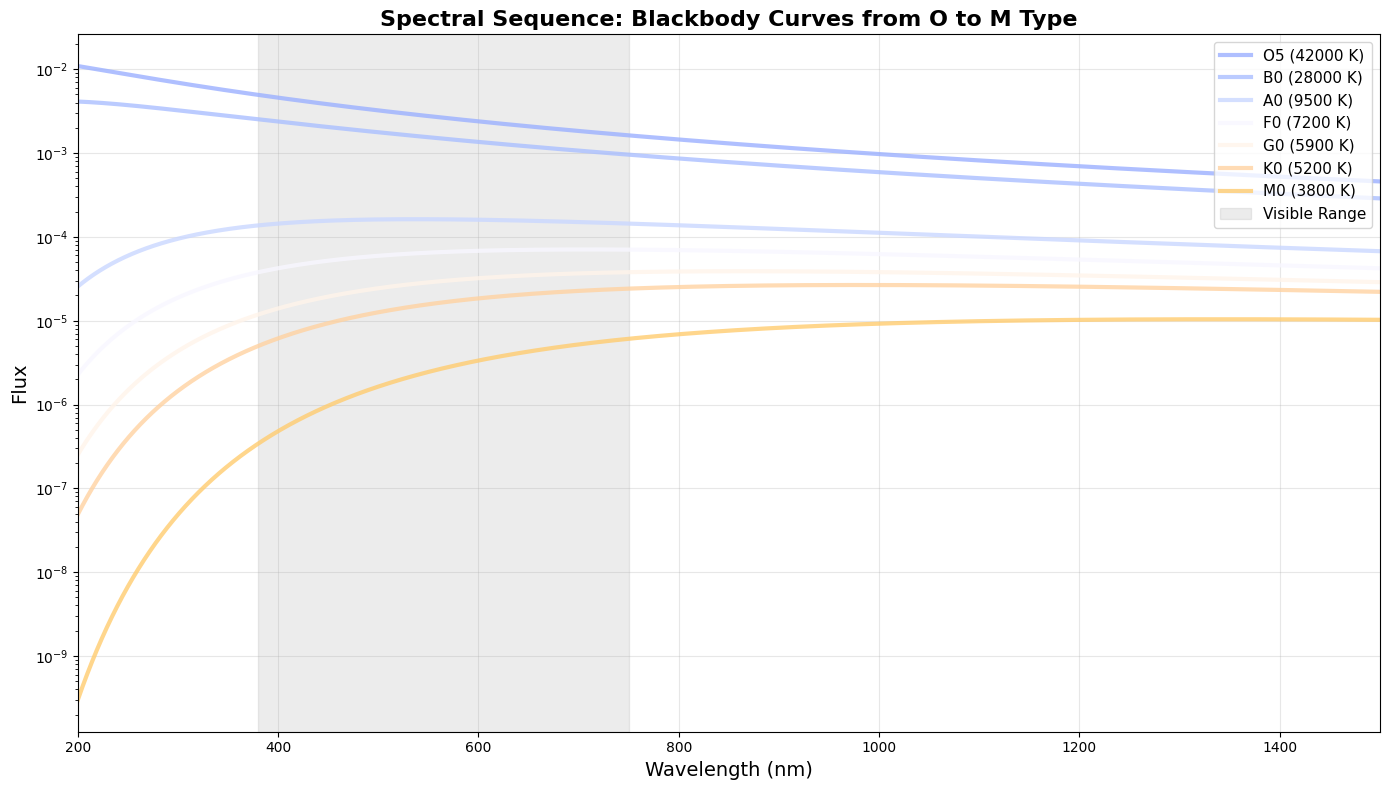


📊 The Spectral Sequence:
From O (hottest, blue) → M (coolest, red)

Notice:
• Peak shifts dramatically from UV (O-type) to IR (M-type)
• Total energy output decreases from O to M
• Most stars we see are actually K and M dwarfs!
• Our Sun is a G2 dwarf - right in the middle!


In [8]:
# Visualize the spectral sequence with blackbody curves
spectral_types = {
    'O5': 42000,
    'B0': 28000,
    'A0': 9500,
    'F0': 7200,
    'G0': 5900,
    'K0': 5200,
    'M0': 3800
}

fig, ax = plt.subplots(figsize=(14, 8))

wavelengths_seq = np.linspace(200, 1500, 3000) * u.nm

color_map = {
    'O5': '#9BB0FF',  # Blue
    'B0': '#AABFFF',  # Blue-white
    'A0': '#CAD7FF',  # White
    'F0': '#F8F7FF',  # Yellow-white
    'G0': '#FFF4EA',  # Yellow
    'K0': '#FFD2A1',  # Orange
    'M0': '#FFCC6F'   # Red
}

for spec_type, temp in spectral_types.items():
    bb = BlackBody(temperature=temp * u.K)
    flux = bb(wavelengths_seq)
    
    ax.plot(wavelengths_seq, flux, label=f'{spec_type} ({temp} K)', 
            linewidth=3, color=color_map[spec_type], alpha=0.8)

# Mark visible spectrum
ax.axvspan(380, 750, alpha=0.15, color='gray', label='Visible Range')

ax.set_xlabel('Wavelength (nm)', fontsize=14)
ax.set_ylabel('Flux', fontsize=14)
ax.set_title('Spectral Sequence: Blackbody Curves from O to M Type', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(200, 1500)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print("\n📊 The Spectral Sequence:")
print("From O (hottest, blue) → M (coolest, red)")
print("\nNotice:")
print("• Peak shifts dramatically from UV (O-type) to IR (M-type)")
print("• Total energy output decreases from O to M")
print("• Most stars we see are actually K and M dwarfs!")
print("• Our Sun is a G2 dwarf - right in the middle!")

## 6. Next Steps in Our Journey

We've laid the foundation! Here's where we're headed:

### Future Topics:
1. **Line Formation** - Why do we see absorption lines? (Excitation, ionization)
2. **Equivalent Width** - Measuring line strength quantitatively
3. **Curve of Growth** - Relating line strength to element abundance
4. **Saha Equation** - Temperature and ionization states
5. **Boltzmann Equation** - Temperature and excitation states
6. **Actual Stellar Data** - Working with real spectra from surveys
7. **Abundance Analysis** - Determining what stars are made of
8. **Doppler Analysis** - Measuring stellar velocities
9. **Binary Stars** - Spectroscopic binaries and radial velocity curves

### Tools We'll Use:
- **Astropy** - For astronomical calculations and data handling
- **Specutils** - For working with spectral data
- **Synphot** - For synthetic photometry
- **Real Data** - From SDSS, LAMOST, or other spectroscopic surveys

---

## 🌠 "The journey of a thousand stars begins with a single photon!"

Ready to continue? Let's dive deeper into the physics of line formation and start analyzing real stellar spectra!

In [9]:
# Summary statistics and key constants
from astropy.constants import h, c, k_B, sigma_sb

print("=" * 70)
print("KEY PHYSICAL CONSTANTS FOR STELLAR SPECTROSCOPY")
print("=" * 70)
print(f"\nPlanck constant (h):           {h}")
print(f"Speed of light (c):            {c}")
print(f"Boltzmann constant (k_B):      {k_B}")
print(f"Stefan-Boltzmann constant (σ): {sigma_sb}")
print(f"Wien displacement constant:    {b_wien}")

print("\n" + "=" * 70)
print("REFERENCE STELLAR PARAMETERS")
print("=" * 70)
print(f"\nSun:")
print(f"  Temperature:      5778 K")
print(f"  Spectral Type:    G2V")
print(f"  Peak Wavelength:  ~502 nm (green, but looks yellow-white)")
print(f"  Composition:      ~73% H, ~25% He, ~2% metals")

print("\n✨ We're ready to explore the chemical makeup of the cosmos!")
print("🔬 Next: Let's get some real stellar spectra and analyze them!")

KEY PHYSICAL CONSTANTS FOR STELLAR SPECTROSCOPY

Planck constant (h):           6.62607015e-34 J s
Speed of light (c):            299792458.0 m / s
Boltzmann constant (k_B):      1.380649e-23 J / K
Stefan-Boltzmann constant (σ): 5.6703744191844314e-08 W / (m2 K4)
Wien displacement constant:    0.0028977719551851727 K m

REFERENCE STELLAR PARAMETERS

Sun:
  Temperature:      5778 K
  Spectral Type:    G2V
  Peak Wavelength:  ~502 nm (green, but looks yellow-white)
  Composition:      ~73% H, ~25% He, ~2% metals

✨ We're ready to explore the chemical makeup of the cosmos!
🔬 Next: Let's get some real stellar spectra and analyze them!


---

## 7. Emission Spectra: A Different Kind of Light

While stars show **absorption spectra** (dark lines on bright continuum), some celestial objects show **emission spectra** (bright lines on dark background)!

### The Discovery of Emission Lines

On August 29, 1864, astronomer William Huggins pointed his spectroscope at a planetary nebula (NGC 6543) in Draco:

> *"The reader may now be able to picture to himself to some extent the feeling of excited suspense, mingled with a degree of awe, with which, after a few moments of hesitation, I put my eye to the spectroscope. Was I not about to look into a secret place of creation? I looked into the spectroscope. No spectrum such as I expected! A single bright line only!"*

Planetary nebulae, hot gas clouds, and emission nebulae show bright emission lines instead of absorption!

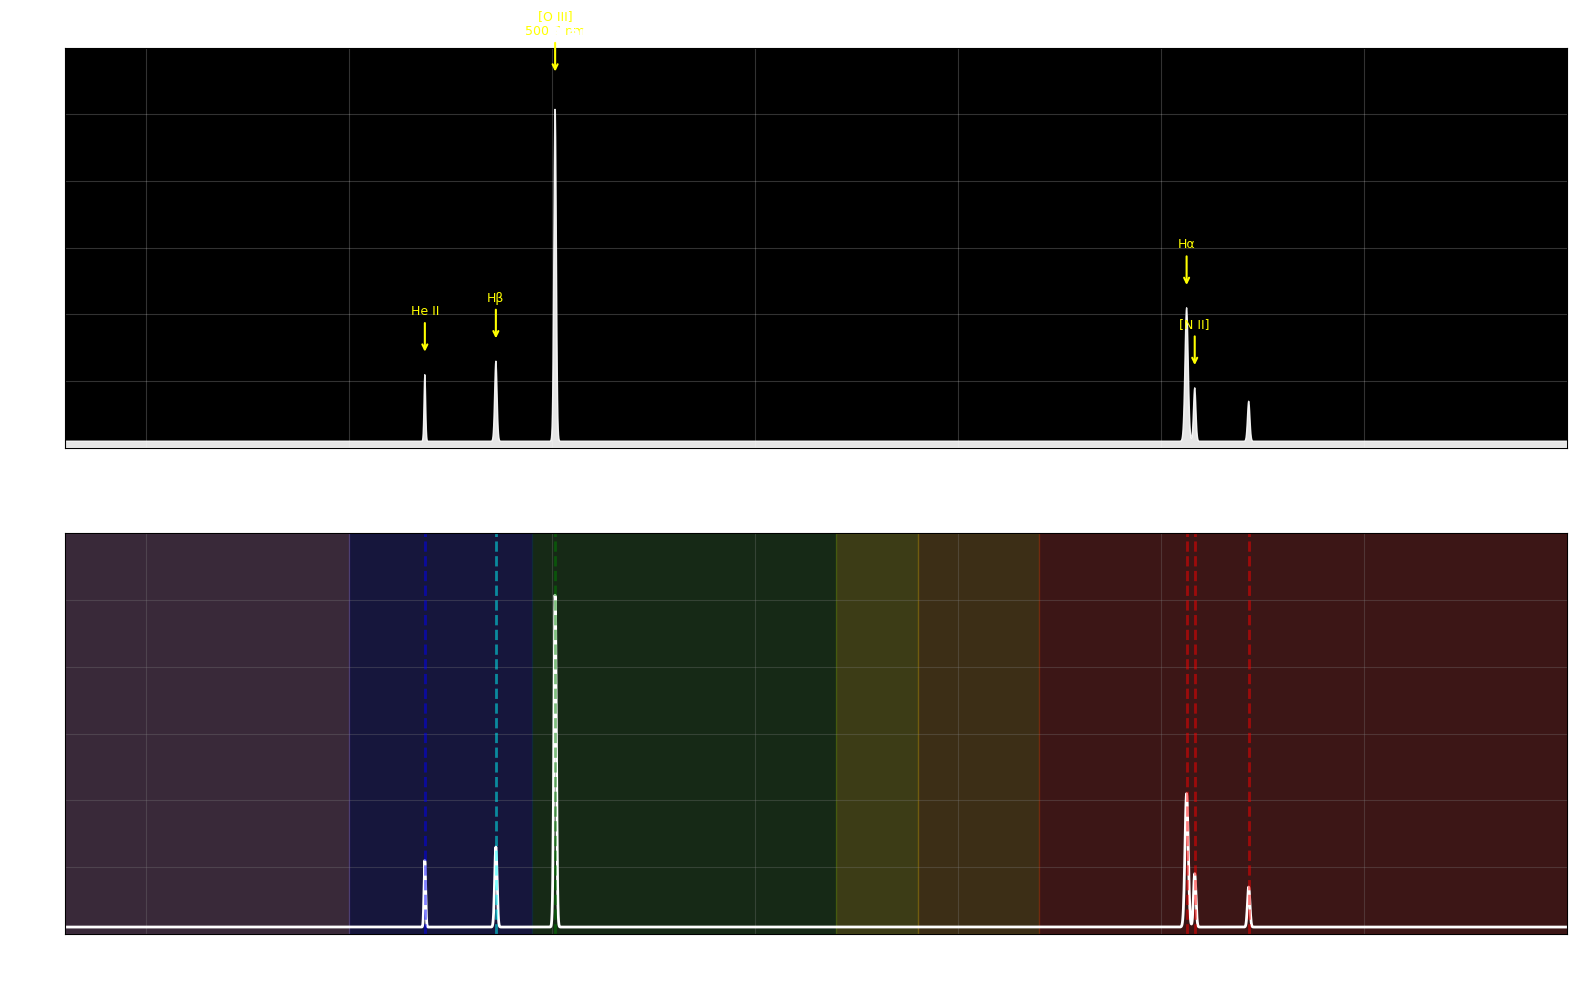


🌌 Emission Lines in Planetary Nebulae:
• [O III] at 500.7 nm - Doubly ionized oxygen (VERY bright!)
• H-alpha and H-beta - Hydrogen recombination lines
• [N II] - Ionized nitrogen
• [S II] - Ionized sulfur
• He II - Ionized helium (very hot regions)

[Brackets] indicate 'forbidden' lines - only possible in very thin gas!


In [10]:
# Simulate emission spectrum of a planetary nebula
# Common emission lines in planetary nebulae

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Wavelength range
wavelengths_em = np.linspace(350, 750, 5000) * u.nm

# Create a very weak continuum (almost zero)
weak_continuum = np.ones_like(wavelengths_em.value) * 0.05

# Emission lines for a planetary nebula
# These are some of the brightest lines observed
emission_lines = {
    'H-beta (Hβ)': {'wave': 486.1, 'strength': 0.6, 'width': 0.3, 'color': 'cyan'},
    '[O III]': {'wave': 495.9, 'strength': 0.8, 'width': 0.3, 'color': 'green'},
    '[O III]': {'wave': 500.7, 'strength': 2.5, 'width': 0.3, 'color': 'green'},  # Strongest line
    'H-alpha (Hα)': {'wave': 656.3, 'strength': 1.0, 'width': 0.4, 'color': 'red'},
    '[N II]': {'wave': 658.3, 'strength': 0.4, 'width': 0.3, 'color': 'red'},
    '[S II]': {'wave': 671.6, 'strength': 0.3, 'width': 0.3, 'color': 'red'},
    'He II': {'wave': 468.6, 'strength': 0.5, 'width': 0.2, 'color': 'blue'},
}

# Create emission spectrum
emission_spectrum = weak_continuum.copy()

for line_name, props in emission_lines.items():
    line_wave = props['wave']
    strength = props['strength']
    width = props['width']
    
    # Create Gaussian emission line (positive!)
    line_profile = strength * np.exp(-0.5 * ((wavelengths_em.value - line_wave) / width)**2)
    emission_spectrum += line_profile

# Top panel: Emission spectrum (bright lines on dark background)
ax1.fill_between(wavelengths_em.value, 0, emission_spectrum, color='white', alpha=0.9)
ax1.set_facecolor('black')
ax1.set_ylim(0, 3)
ax1.set_xlim(380, 750)
ax1.set_xlabel('Wavelength (nm)', fontsize=12, color='white')
ax1.set_ylabel('Intensity', fontsize=12, color='white')
ax1.set_title('Planetary Nebula Emission Spectrum (NGC 6543)', 
              fontsize=14, fontweight='bold', color='white')
ax1.tick_params(colors='white')
ax1.grid(True, alpha=0.2, color='white')

# Add element labels
label_positions = {
    'He II': (468.6, 0.7),
    'Hβ': (486.1, 0.8),
    '[O III]\n500.7 nm': (500.7, 2.8),
    'Hα': (656.3, 1.2),
    '[N II]': (658.3, 0.6),
}

for label, (wave, height) in label_positions.items():
    ax1.annotate(label, xy=(wave, height), xytext=(wave, height + 0.3),
                fontsize=9, ha='center', color='yellow',
                arrowprops=dict(arrowstyle='->', color='yellow', lw=1.5))

# Bottom panel: Modern graph style
ax2.plot(wavelengths_em.value, emission_spectrum, 'w-', linewidth=2, label='Emission Spectrum')
ax2.set_facecolor('#1a1a1a')

# Highlight the brightest lines
for line_name, props in emission_lines.items():
    line_wave = props['wave']
    line_color = props['color']
    if 380 < line_wave < 750:
        ax2.axvline(line_wave, color=line_color, alpha=0.5, linestyle='--', linewidth=2)

ax2.set_xlabel('Wavelength (nm)', fontsize=12, color='white')
ax2.set_ylabel('Intensity', fontsize=12, color='white')
ax2.set_title('Emission Lines vs Absorption Lines', fontsize=14, fontweight='bold', color='white')
ax2.set_xlim(380, 750)
ax2.set_ylim(0, 3)
ax2.tick_params(colors='white')
ax2.grid(True, alpha=0.3, color='gray')

# Add colored background for visible spectrum
colors_vis = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
bounds = [380, 450, 495, 570, 590, 620, 750]
for i in range(len(colors_vis)):
    ax2.axvspan(bounds[i], bounds[i+1], alpha=0.15, color=colors_vis[i])

plt.tight_layout()
plt.show()

print("\n🌌 Emission Lines in Planetary Nebulae:")
print("• [O III] at 500.7 nm - Doubly ionized oxygen (VERY bright!)")
print("• H-alpha and H-beta - Hydrogen recombination lines")
print("• [N II] - Ionized nitrogen")
print("• [S II] - Ionized sulfur")
print("• He II - Ionized helium (very hot regions)")
print("\n[Brackets] indicate 'forbidden' lines - only possible in very thin gas!")

## 8. Kirchhoff's Laws: The Rosetta Stone of Spectroscopy

In the 1850s, German physicist **Gustav Kirchhoff** figured out why we see different types of spectra. His three laws explain everything:

### Kirchhoff's Three Laws:

1. **Continuous Spectrum**: A hot, dense object (solid, liquid, or dense gas) emits light at all wavelengths
   - Example: The hot interior of a star, or a heated metal

2. **Emission Spectrum**: A hot, thin gas emits light only at specific wavelengths characteristic of its composition
   - Example: Planetary nebulae, emission nebulae, gas discharge lamps

3. **Absorption Spectrum**: A cool, thin gas in front of a continuous source absorbs light at the same specific wavelengths it would emit
   - Example: Stellar atmospheres, the Sun's photosphere

### The Key Insight:
**Each element absorbs and emits at exactly the same wavelengths!**

This is the foundation of all spectroscopic analysis.

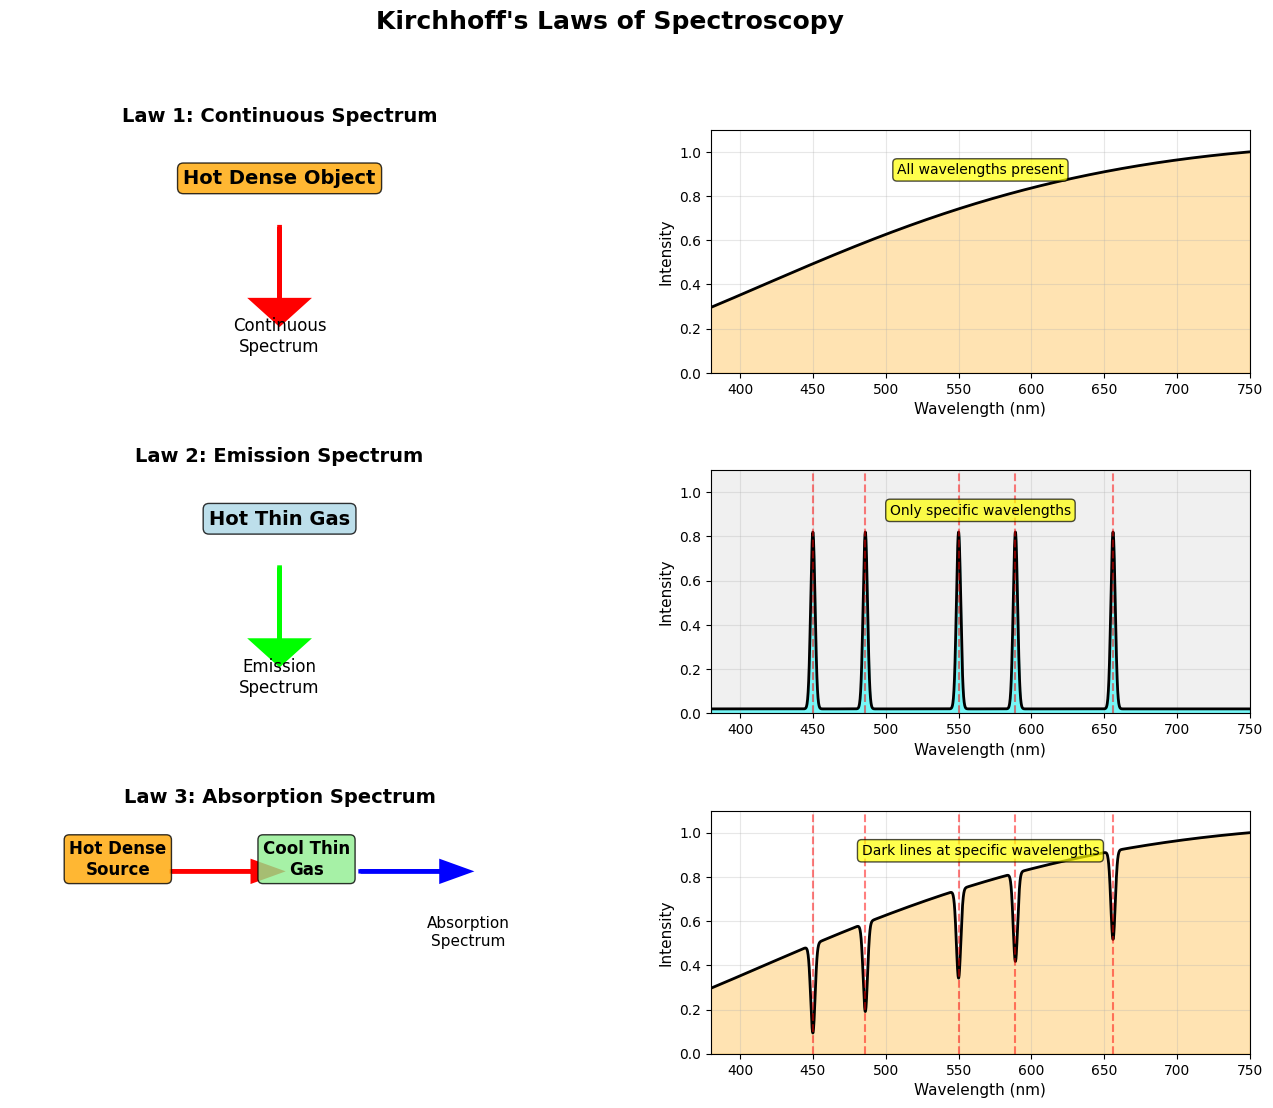


📜 Kirchhoff's Insight:
• The SAME gas emits AND absorbs at the SAME wavelengths
• This allows us to identify elements in distant stars!
• A stellar spectrum = Hot dense core (continuous) + Cool thin atmosphere (absorption)

🌟 This explains stellar photospheres perfectly!


In [11]:
# Visualize Kirchhoff's Three Laws

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

wavelengths_k = np.linspace(380, 750, 3000)

# Define some sample absorption/emission wavelengths
sample_lines = [450, 486, 550, 589, 656]

# LAW 1: Continuous Spectrum
ax1 = fig.add_subplot(gs[0, 0])
ax1_spectrum = fig.add_subplot(gs[0, 1])

# Diagram
ax1.text(0.5, 0.8, 'Hot Dense Object', ha='center', va='center', 
         fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))
ax1.arrow(0.5, 0.6, 0, -0.3, head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=3)
ax1.text(0.5, 0.15, 'Continuous\nSpectrum', ha='center', va='center', fontsize=12)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.set_title("Law 1: Continuous Spectrum", fontsize=14, fontweight='bold')

# Spectrum
continuum = BlackBody(temperature=5800*u.K)(wavelengths_k * u.nm)
ax1_spectrum.plot(wavelengths_k, continuum/continuum.max(), 'k-', linewidth=2)
ax1_spectrum.fill_between(wavelengths_k, 0, continuum/continuum.max(), alpha=0.3, color='orange')
ax1_spectrum.set_xlim(380, 750)
ax1_spectrum.set_ylim(0, 1.1)
ax1_spectrum.set_xlabel('Wavelength (nm)', fontsize=11)
ax1_spectrum.set_ylabel('Intensity', fontsize=11)
ax1_spectrum.grid(True, alpha=0.3)
ax1_spectrum.text(565, 0.9, 'All wavelengths present', ha='center', fontsize=10, 
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# LAW 2: Emission Spectrum
ax2 = fig.add_subplot(gs[1, 0])
ax2_spectrum = fig.add_subplot(gs[1, 1])

# Diagram
ax2.text(0.5, 0.8, 'Hot Thin Gas', ha='center', va='center', 
         fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax2.arrow(0.5, 0.6, 0, -0.3, head_width=0.1, head_length=0.1, fc='lime', ec='lime', linewidth=3)
ax2.text(0.5, 0.15, 'Emission\nSpectrum', ha='center', va='center', fontsize=12)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.set_title("Law 2: Emission Spectrum", fontsize=14, fontweight='bold')

# Spectrum
emission = np.ones_like(wavelengths_k) * 0.02
for line_wave in sample_lines:
    emission += 0.8 * np.exp(-0.5 * ((wavelengths_k - line_wave) / 1.5)**2)

ax2_spectrum.plot(wavelengths_k, emission, 'k-', linewidth=2)
ax2_spectrum.fill_between(wavelengths_k, 0, emission, alpha=0.5, color='cyan')
ax2_spectrum.set_xlim(380, 750)
ax2_spectrum.set_ylim(0, 1.1)
ax2_spectrum.set_xlabel('Wavelength (nm)', fontsize=11)
ax2_spectrum.set_ylabel('Intensity', fontsize=11)
ax2_spectrum.grid(True, alpha=0.3)
ax2_spectrum.set_facecolor('#f0f0f0')
ax2_spectrum.text(565, 0.9, 'Only specific wavelengths', ha='center', fontsize=10,
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# LAW 3: Absorption Spectrum
ax3 = fig.add_subplot(gs[2, 0])
ax3_spectrum = fig.add_subplot(gs[2, 1])

# Diagram
ax3.text(0.2, 0.8, 'Hot Dense\nSource', ha='center', va='center', 
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))
ax3.arrow(0.3, 0.75, 0.15, 0, head_width=0.08, head_length=0.05, fc='red', ec='red', linewidth=3)
ax3.text(0.55, 0.8, 'Cool Thin\nGas', ha='center', va='center', 
         fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax3.arrow(0.65, 0.75, 0.15, 0, head_width=0.08, head_length=0.05, fc='blue', ec='blue', linewidth=3)
ax3.text(0.85, 0.5, 'Absorption\nSpectrum', ha='center', va='center', fontsize=11)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.set_title("Law 3: Absorption Spectrum", fontsize=14, fontweight='bold')

# Spectrum
absorption = continuum/continuum.max()
for line_wave in sample_lines:
    absorption -= 0.4 * np.exp(-0.5 * ((wavelengths_k - line_wave) / 1.5)**2)

ax3_spectrum.plot(wavelengths_k, absorption, 'k-', linewidth=2)
ax3_spectrum.fill_between(wavelengths_k, 0, absorption, alpha=0.3, color='orange')
ax3_spectrum.set_xlim(380, 750)
ax3_spectrum.set_ylim(0, 1.1)
ax3_spectrum.set_xlabel('Wavelength (nm)', fontsize=11)
ax3_spectrum.set_ylabel('Intensity', fontsize=11)
ax3_spectrum.grid(True, alpha=0.3)
ax3_spectrum.text(565, 0.9, 'Dark lines at specific wavelengths', ha='center', fontsize=10,
                  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Mark the same wavelengths in Laws 2 and 3 to show they match
for line_wave in sample_lines:
    ax2_spectrum.axvline(line_wave, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
    ax3_spectrum.axvline(line_wave, color='red', linestyle='--', alpha=0.5, linewidth=1.5)

plt.suptitle("Kirchhoff's Laws of Spectroscopy", fontsize=18, fontweight='bold', y=0.98)
plt.show()

print("\n📜 Kirchhoff's Insight:")
print("• The SAME gas emits AND absorbs at the SAME wavelengths")
print("• This allows us to identify elements in distant stars!")
print("• A stellar spectrum = Hot dense core (continuous) + Cool thin atmosphere (absorption)")
print("\n🌟 This explains stellar photospheres perfectly!")

## 9. The Discovery of Helium: Found in the Sun First!

One of the most remarkable stories in spectroscopy is the discovery of **helium** - an element found in the Sun before it was found on Earth!

### The Timeline:

**1868**: During a solar eclipse, astronomers observed a mysterious yellow emission line (587.6 nm) in the Sun's chromosphere that didn't match any known element.

**1868**: English astronomer **Joseph Norman Lockyer** boldly proposed a new element: **"Helium"** (from Greek *helios* = Sun)

Contemporary scientists were skeptical. One poet even wrote:
> *"And Lockyer, and Lockyer,*  
> *grows cockier, and cockier,*  
> *for he thinks he's the owner*  
> *of the solar corona"*

**1895**: William Ramsay isolated a strange inert gas from uranium compounds. Its spectral line matched exactly the solar line!

**Result**: Lockyer was vindicated! Helium became the only element discovered in space before being found on Earth.

### The Mystery of "Nebulium"

**1918**: W. H. Wright at Lick Observatory found two strong emission lines in planetary nebulae at 495.9 nm and 500.7 nm. He proposed another new element: **"nebulium"**

**1927**: I. S. Bowen at Caltech solved the mystery - these weren't from a new element, but from **doubly-ionized oxygen [O III]** in "forbidden" transitions that can only occur in extremely low-density gas!

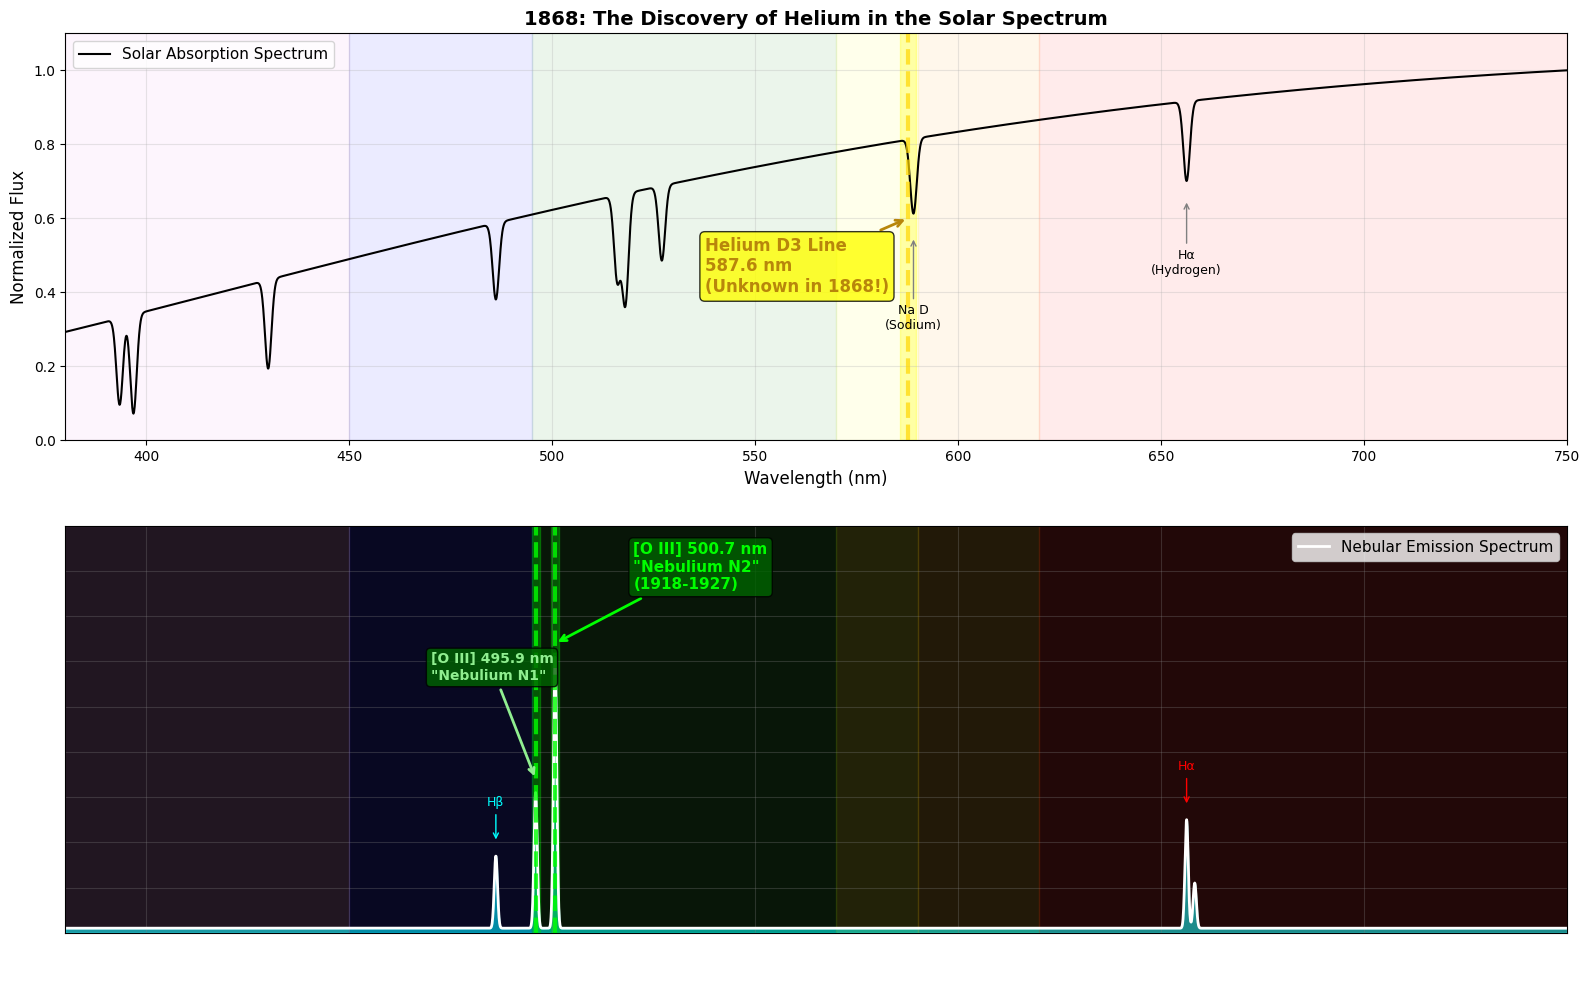


🎭 The Stories:

1. HELIUM (1868-1895):
   • Found in the Sun 27 years before found on Earth!
   • Named after 'Helios' (Greek for Sun)
   • Lockyer was RIGHT - it was a new element!

2. 'NEBULIUM' (1918-1927):
   • NOT a new element - just excited oxygen [O III]
   • 'Forbidden' transitions only possible in very thin gas
   • Densities < 10^6 atoms/cm³ (Earth's atmosphere: 10^19 atoms/cm³!)

💡 These discoveries showed that space contains exotic conditions
   impossible to reproduce in laboratories on Earth!


In [12]:
# Visualize the discovery of Helium and the "Nebulium" mystery

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Wavelength arrays
wavelengths_solar = np.linspace(380, 750, 5000)
wavelengths_nebula = np.linspace(380, 750, 5000)

# PANEL 1: Solar Spectrum showing the Helium D3 line
# Create absorption spectrum (simplified)
solar_continuum = BlackBody(temperature=5778*u.K)(wavelengths_solar * u.nm)
solar_continuum = solar_continuum / solar_continuum.max()

# Add various absorption lines (simplified)
solar_absorption = solar_continuum.value.copy()
absorption_lines_solar = [393.4, 396.8, 430, 486.1, 516, 518, 527, 589.0, 656.3]
for line_wave in absorption_lines_solar:
    depth = 0.2 + 0.15 * np.random.random()
    width = 0.8
    solar_absorption -= depth * np.exp(-0.5 * ((wavelengths_solar - line_wave) / width)**2)

# Plot solar spectrum
ax1.plot(wavelengths_solar, solar_absorption, 'k-', linewidth=1.5, label='Solar Absorption Spectrum')

# Highlight the Helium D3 line
helium_D3 = 587.6
ax1.axvline(helium_D3, color='gold', linestyle='--', linewidth=3, alpha=0.7)
ax1.axvspan(helium_D3-2, helium_D3+2, alpha=0.3, color='yellow')
ax1.annotate('Helium D3 Line\n587.6 nm\n(Unknown in 1868!)', 
             xy=(helium_D3, 0.6), xytext=(helium_D3-50, 0.4),
             fontsize=12, fontweight='bold', color='darkgoldenrod',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='darkgoldenrod', lw=2))

# Mark some known lines for context
ax1.annotate('Na D\n(Sodium)', xy=(589, 0.55), xytext=(589, 0.3),
             fontsize=9, ha='center',
             arrowprops=dict(arrowstyle='->', color='gray', lw=1))
ax1.annotate('Hα\n(Hydrogen)', xy=(656.3, 0.65), xytext=(656.3, 0.45),
             fontsize=9, ha='center',
             arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Normalized Flux', fontsize=12)
ax1.set_title('1868: The Discovery of Helium in the Solar Spectrum', 
              fontsize=14, fontweight='bold')
ax1.set_xlim(380, 750)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=11)

# Add colored background
colors_vis = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
bounds = [380, 450, 495, 570, 590, 620, 750]
for i in range(len(colors_vis)):
    ax1.axvspan(bounds[i], bounds[i+1], alpha=0.08, color=colors_vis[i])

# PANEL 2: Nebular Spectrum showing "Nebulium" lines
# Create emission spectrum
nebula_emission = np.ones_like(wavelengths_nebula) * 0.05

# Strong [O III] "nebulium" lines
nebulium_lines = {
    '[O III] 495.9 nm\n("Nebulium N1")': {'wave': 495.9, 'strength': 1.5},
    '[O III] 500.7 nm\n("Nebulium N2")': {'wave': 500.7, 'strength': 3.0},
}

# Other nebular lines
other_lines = {
    'Hβ': {'wave': 486.1, 'strength': 0.8},
    'Hα': {'wave': 656.3, 'strength': 1.2},
    '[N II]': {'wave': 658.3, 'strength': 0.5},
}

# Add all emission lines
all_lines = {**nebulium_lines, **other_lines}
for line_name, props in all_lines.items():
    line_wave = props['wave']
    strength = props['strength']
    width = 0.4
    nebula_emission += strength * np.exp(-0.5 * ((wavelengths_nebula - line_wave) / width)**2)

# Plot nebular spectrum
ax2.plot(wavelengths_nebula, nebula_emission, 'w-', linewidth=2, label='Nebular Emission Spectrum')
ax2.fill_between(wavelengths_nebula, 0, nebula_emission, alpha=0.6, color='cyan')
ax2.set_facecolor('#0a0a0a')

# Highlight the "Nebulium" lines
for line_name, props in nebulium_lines.items():
    line_wave = props['wave']
    ax2.axvline(line_wave, color='lime', linestyle='--', linewidth=3, alpha=0.8)
    ax2.axvspan(line_wave-1, line_wave+1, alpha=0.3, color='lime')

# Annotate nebulium lines
ax2.annotate('[O III] 500.7 nm\n"Nebulium N2"\n(1918-1927)', 
             xy=(500.7, 3.2), xytext=(520, 3.8),
             fontsize=11, fontweight='bold', color='lime',
             bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='lime', lw=2))

ax2.annotate('[O III] 495.9 nm\n"Nebulium N1"', 
             xy=(495.9, 1.7), xytext=(470, 2.8),
             fontsize=10, fontweight='bold', color='lightgreen',
             bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.8),
             arrowprops=dict(arrowstyle='->', color='lightgreen', lw=2))

# Mark other lines
ax2.annotate('Hβ', xy=(486.1, 1.0), xytext=(486.1, 1.4),
             fontsize=9, ha='center', color='cyan',
             arrowprops=dict(arrowstyle='->', color='cyan', lw=1))
ax2.annotate('Hα', xy=(656.3, 1.4), xytext=(656.3, 1.8),
             fontsize=9, ha='center', color='red',
             arrowprops=dict(arrowstyle='->', color='red', lw=1))

ax2.set_xlabel('Wavelength (nm)', fontsize=12, color='white')
ax2.set_ylabel('Intensity', fontsize=12, color='white')
ax2.set_title('1918: The "Nebulium" Mystery in Planetary Nebulae', 
              fontsize=14, fontweight='bold', color='white')
ax2.set_xlim(380, 750)
ax2.set_ylim(0, 4.5)
ax2.tick_params(colors='white')
ax2.grid(True, alpha=0.3, color='gray')
ax2.legend(loc='upper right', fontsize=11)

# Add colored background
for i in range(len(colors_vis)):
    ax2.axvspan(bounds[i], bounds[i+1], alpha=0.1, color=colors_vis[i])

plt.tight_layout()
plt.show()

print("\n🎭 The Stories:")
print("\n1. HELIUM (1868-1895):")
print("   • Found in the Sun 27 years before found on Earth!")
print("   • Named after 'Helios' (Greek for Sun)")
print("   • Lockyer was RIGHT - it was a new element!")
print("\n2. 'NEBULIUM' (1918-1927):")
print("   • NOT a new element - just excited oxygen [O III]")
print("   • 'Forbidden' transitions only possible in very thin gas")
print("   • Densities < 10^6 atoms/cm³ (Earth's atmosphere: 10^19 atoms/cm³!)")
print("\n💡 These discoveries showed that space contains exotic conditions")
print("   impossible to reproduce in laboratories on Earth!")

## 10. Element Identification: Spectral Fingerprints

Every element has a unique "fingerprint" of spectral lines. By the early 1900s, scientists could identify dozens of elements in the Sun and stars by matching laboratory spectra with astronomical observations.

### Common Elements in Stellar Spectra:

| Element | Key Lines (nm) | Ionization State | Typical Stars |
|---------|---------------|------------------|---------------|
| **Hydrogen (H)** | 656.3 (Hα), 486.1 (Hβ), 434.0 (Hγ) | Neutral (H I) | All stars, strongest in A-type |
| **Helium (He)** | 587.6 (D3), 501.6, 447.1 | Neutral & Ionized | Hot stars (O, B, A) |
| **Calcium (Ca)** | 393.4 (K), 396.8 (H) | Ionized (Ca II) | Cool stars (F, G, K) |
| **Sodium (Na)** | 589.0, 589.6 (D doublet) | Neutral (Na I) | Cool stars |
| **Iron (Fe)** | Many lines (382-680) | Neutral & Ionized | Sun-like stars |
| **Magnesium (Mg)** | 518.4 (b triplet) | Neutral (Mg I) | Cool stars |
| **Oxygen (O)** | 777.4 (triplet) | Neutral (O I) | Cool stars |
| **Titanium (Ti)** | TiO bands (~600-900) | Molecules (TiO) | Very cool M-type stars |

### Ionization States:
- **Neutral** atoms: Designated with Roman numeral **I** (e.g., Fe I, Ca I)
- **Singly ionized**: Designated with **II** (e.g., Ca II = Ca⁺, Fe II = Fe⁺)
- **Doubly ionized**: Designated with **III** (e.g., O III = O²⁺)

The ionization state tells us about the temperature of the gas!

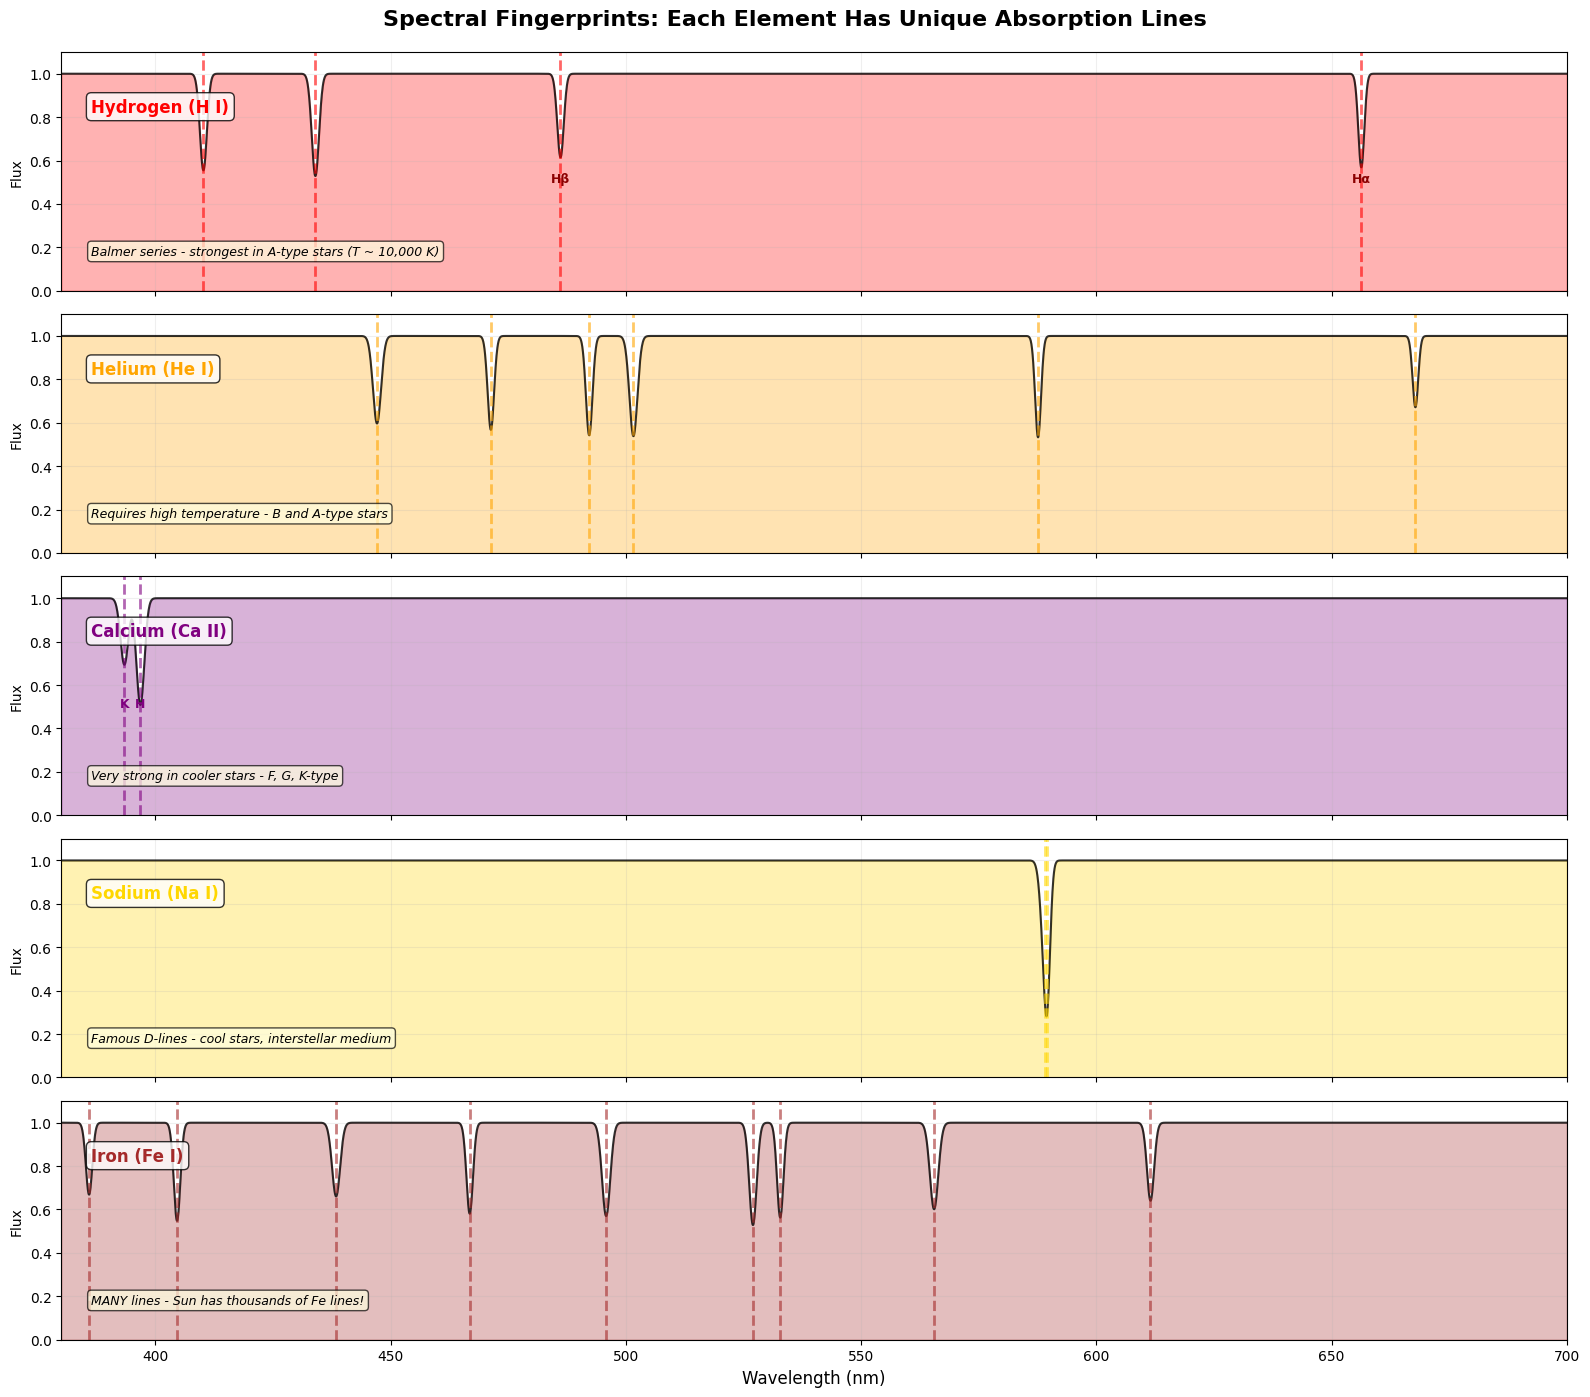


🔬 Spectral Analysis:

• By comparing stellar spectra with laboratory spectra,
  astronomers can identify which elements are present

• The STRENGTH of lines reveals:
  - Abundance of the element
  - Temperature (affects ionization)
  - Pressure (affects line width)

• The WAVELENGTH SHIFT reveals:
  - Radial velocity (Doppler effect)
  - Gravitational redshift

🌟 This is how we know what stars are made of!


In [13]:
# Create a comparison of spectral fingerprints for different elements

fig, axes = plt.subplots(5, 1, figsize=(16, 14), sharex=True)

wavelengths_elem = np.linspace(380, 700, 5000)

# Define spectral lines for different elements
element_lines = {
    'Hydrogen (H I)': {
        'lines': [410.2, 434.0, 486.1, 656.3],
        'color': 'red',
        'comment': 'Balmer series - strongest in A-type stars (T ~ 10,000 K)'
    },
    'Helium (He I)': {
        'lines': [447.1, 471.3, 492.2, 501.6, 587.6, 667.8],
        'color': 'orange',
        'comment': 'Requires high temperature - B and A-type stars'
    },
    'Calcium (Ca II)': {
        'lines': [393.4, 396.8],  # K and H lines
        'color': 'purple',
        'comment': 'Very strong in cooler stars - F, G, K-type'
    },
    'Sodium (Na I)': {
        'lines': [589.0, 589.6],  # D doublet (close together)
        'color': 'gold',
        'comment': 'Famous D-lines - cool stars, interstellar medium'
    },
    'Iron (Fe I)': {
        'lines': [385.9, 404.6, 438.4, 466.8, 495.8, 527.0, 532.8, 565.5, 611.5],
        'color': 'brown',
        'comment': 'MANY lines - Sun has thousands of Fe lines!'
    },
}

# Plot each element's spectrum
for idx, (element_name, data) in enumerate(element_lines.items()):
    ax = axes[idx]
    
    # Create a continuum
    continuum = np.ones_like(wavelengths_elem)
    
    # Add absorption lines
    spectrum = continuum.copy()
    for line_wave in data['lines']:
        if 380 < line_wave < 700:
            depth = 0.3 + 0.2 * np.random.random()
            width = 0.6 + 0.3 * np.random.random()
            spectrum -= depth * np.exp(-0.5 * ((wavelengths_elem - line_wave) / width)**2)
    
    # Plot
    ax.plot(wavelengths_elem, spectrum, 'k-', linewidth=1.5, alpha=0.8)
    ax.fill_between(wavelengths_elem, 0, spectrum, alpha=0.3, color=data['color'])
    
    # Mark the lines
    for line_wave in data['lines']:
        if 380 < line_wave < 700:
            ax.axvline(line_wave, color=data['color'], linestyle='--', 
                      linewidth=2, alpha=0.6)
            # Label the strongest lines
            if element_name == 'Hydrogen (H I)' and line_wave in [486.1, 656.3]:
                label = 'Hβ' if line_wave == 486.1 else 'Hα'
                ax.text(line_wave, 0.5, label, rotation=0, fontsize=9, 
                       ha='center', color='darkred', fontweight='bold')
            elif element_name == 'Calcium (Ca II)':
                label = 'K' if line_wave == 393.4 else 'H'
                ax.text(line_wave, 0.5, label, rotation=0, fontsize=9,
                       ha='center', color='purple', fontweight='bold')
    
    # Labels and formatting
    ax.set_ylabel('Flux', fontsize=10)
    ax.set_ylim(0, 1.1)
    ax.grid(True, alpha=0.2)
    
    # Element name and comment
    ax.text(0.02, 0.75, element_name, transform=ax.transAxes, fontsize=12,
           fontweight='bold', color=data['color'],
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.text(0.02, 0.15, data['comment'], transform=ax.transAxes, fontsize=9,
           style='italic', color='black',
           bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

axes[-1].set_xlabel('Wavelength (nm)', fontsize=12)
axes[-1].set_xlim(380, 700)

plt.suptitle('Spectral Fingerprints: Each Element Has Unique Absorption Lines', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n🔬 Spectral Analysis:")
print("\n• By comparing stellar spectra with laboratory spectra,")
print("  astronomers can identify which elements are present")
print("\n• The STRENGTH of lines reveals:")
print("  - Abundance of the element")
print("  - Temperature (affects ionization)")
print("  - Pressure (affects line width)")
print("\n• The WAVELENGTH SHIFT reveals:")
print("  - Radial velocity (Doppler effect)")
print("  - Gravitational redshift")
print("\n🌟 This is how we know what stars are made of!")

## 11. Summary: From Light to Chemistry

We've journeyed from basic blackbody radiation to understanding how spectra reveal the chemical composition of stars!

### What We've Learned:

1. ✅ **Blackbody Radiation** - Stars emit like hot dense objects following Planck's law
2. ✅ **Wien's Law** - Peak wavelength reveals temperature
3. ✅ **Photometry** - Color indices give rough temperature estimates
4. ✅ **Kirchhoff's Laws** - The foundation: continuous, emission, and absorption spectra
5. ✅ **Emission vs Absorption** - Hot thin gas emits, cool thin gas absorbs
6. ✅ **Element Identification** - Each element has unique spectral fingerprints
7. ✅ **Historical Discoveries** - Helium found in Sun first; "nebulium" was excited oxygen

### The Power of Spectroscopy:

From a single spectrum, we can determine:
- 🌡️ **Temperature** (from continuum shape and line ratios)
- 🧪 **Chemical Composition** (from line identification)
- 🌊 **Pressure** (from line widths)
- 🌀 **Rotation** (from line broadening)
- 🚀 **Velocity** (from Doppler shifts)
- 🧲 **Magnetic Fields** (from Zeeman splitting)
- 📏 **Distance** (from spectroscopic parallax)

### Next Steps:

In future notebooks, we'll explore:
- **Quantum Mechanics** - Why atoms absorb/emit specific wavelengths
- **Saha & Boltzmann Equations** - Temperature and ionization/excitation
- **Abundance Analysis** - Measuring element ratios quantitatively
- **Real Stellar Spectra** - Working with data from surveys
- **Exoplanet Detection** - Using radial velocity method

---

## 🌌 "We are all made of star stuff" - Carl Sagan

And spectroscopy is how we know this! Every atom in our bodies was forged in stellar interiors, and we can read that history in the light from the stars.